## U.S E-Commerce Records 2020

#### Import Relevant Libraries

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import autoreload
import os
import sys
import csv

from collections import defaultdict, Counter


%matplotlib inline
%reload_ext autoreload
%autoreload 2

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

sb.set_style("darkgrid")
sb.set()

In [2]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\United States E-Commerce records 2020\US  E-commerce records 2020.csv", encoding = "latin1")
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


#### Data Statistical Presentation

In [3]:
df.shape

(3312, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [5]:
round(df.describe())

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,3312.0,3312.0,3312.0,3312.0,3312.0,3312.0
mean,5087.0,56187.0,221.0,4.0,0.0,28.0
std,2817.0,31980.0,585.0,2.0,0.0,242.0
min,13.0,1841.0,0.0,1.0,0.0,-3840.0
25%,2656.0,27979.0,17.0,2.0,0.0,2.0
50%,5184.0,60472.0,54.0,3.0,0.0,8.0
75%,7498.0,90032.0,205.0,5.0,0.0,28.0
max,9994.0,99301.0,14000.0,14.0,1.0,6720.0


In [6]:
df.isnull().sum()

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

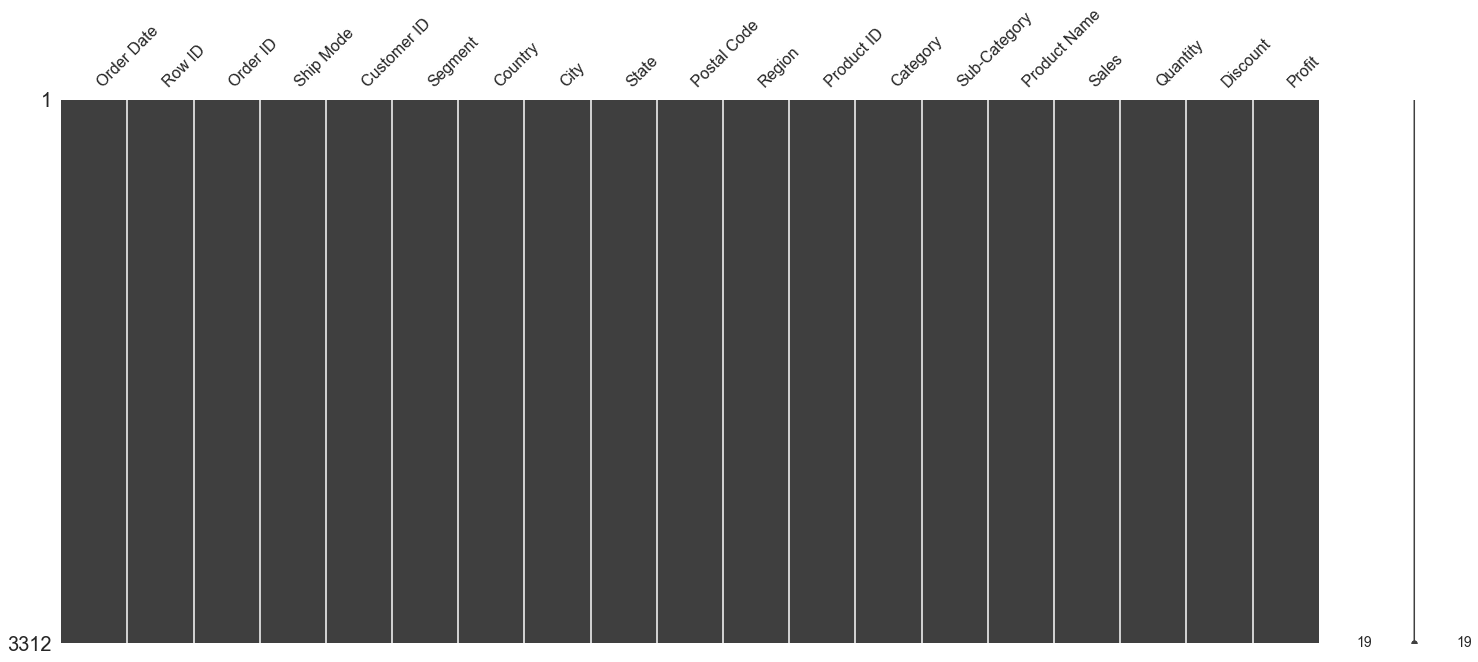

In [7]:
msno.matrix(df)

Text(0, 0.5, 'Total deliveries')

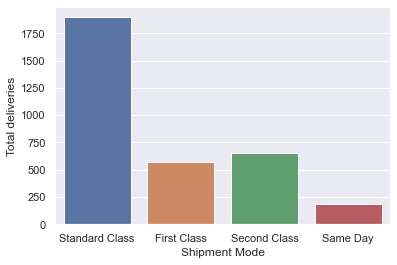

In [8]:
sb.countplot(df["Ship Mode"])
plt.xlabel("Shipment Mode")
plt.ylabel("Total deliveries")

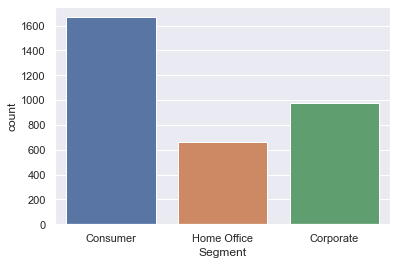

In [9]:
sb.countplot(df["Segment"])

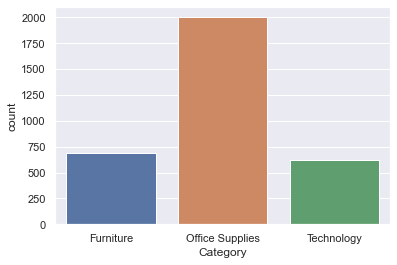

In [10]:
sb.countplot(df["Category"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

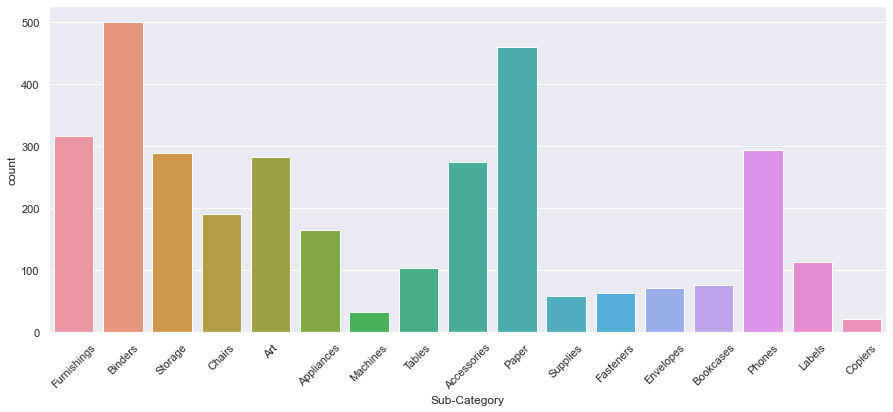

In [11]:
plt.figure(figsize = (15, 6))
sb.countplot(df["Sub-Category"])
plt.xticks(rotation = 45)

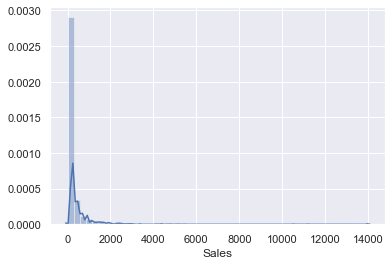

In [12]:
sb.distplot(df["Sales"])

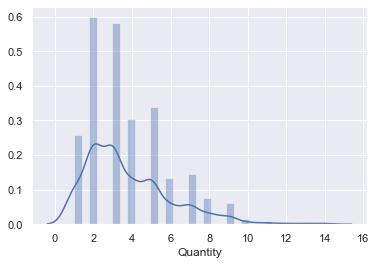

In [13]:
sb.distplot(df["Quantity"])

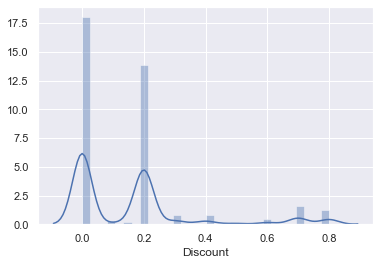

In [14]:
sb.distplot(df["Discount"])

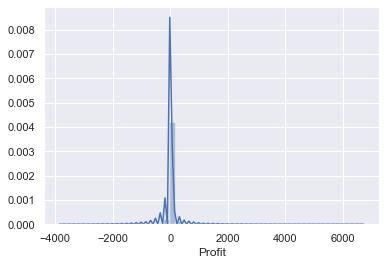

In [15]:
sb.distplot(df["Profit"])

#### Data Cleaning and Manipulation

In [16]:
df.drop(columns = ["Order ID", "Row ID", "Customer ID", "Postal Code", "Product ID", "Country"], inplace = True)
df.head()

,Order Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,Standard Class,Consumer,Lorain,Ohio,East,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,First Class,Home Office,Franklin,Wisconsin,Central,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,Standard Class,Consumer,Huntsville,Texas,Central,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,Standard Class,Consumer,Huntsville,Texas,Central,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [17]:
df["Order Date"] = df["Order Date"].astype("datetime64")

In [23]:
per_day = df.groupby("Order Date")
per_day["Sales"].value_counts()

Order Date  Sales  
2020-01-01  3.600      1
            6.470      1
            12.736     1
            13.748     1
            15.224     1
                      ..
2020-12-30  20.720     1
            52.776     1
            90.930     1
            209.300    1
            323.136    1
Name: Sales, Length: 3307, dtype: int64

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]),
 <a list of 11 Text major ticklabel objects>)

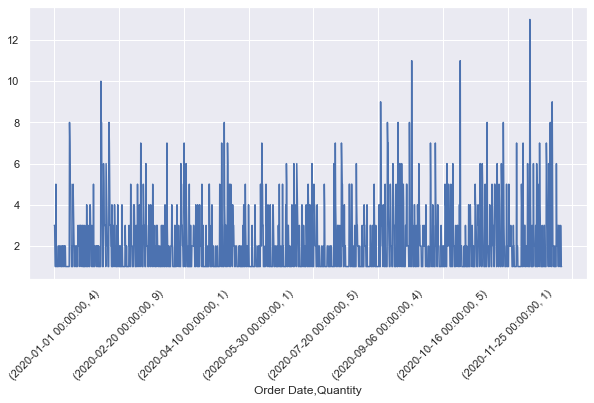

In [32]:
plt.figure(figsize = (10, 5))
per_day["Quantity"].value_counts().plot()
plt.xticks(rotation = 45)